In [1]:
# Import Libraries

import pandas as pd          
import numpy as np              
import seaborn as sns            
import matplotlib.pyplot as plt          


In [2]:
# Load the Data 
df = pd.read_csv("penguins.csv")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [3]:
df.columns = df.columns.str.lower().str.strip()

In [4]:
df_num  = df.select_dtypes(include="float64")
df_corr = df_num.corr()

df_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


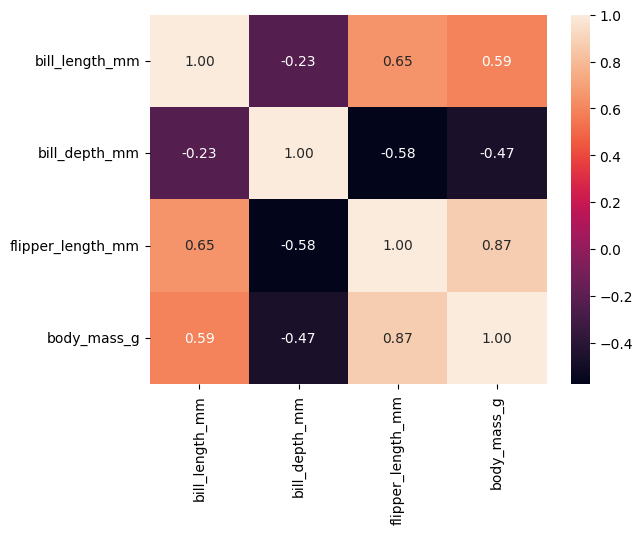

In [5]:
sns.heatmap(data=df_corr, annot=True, fmt=".2f")
plt.show()

In [6]:
df.groupby(["species"])["flipper_length_mm"].mean()

species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64

In [7]:
list(df["species"].unique())

['Adelie', 'Chinstrap', 'Gentoo']

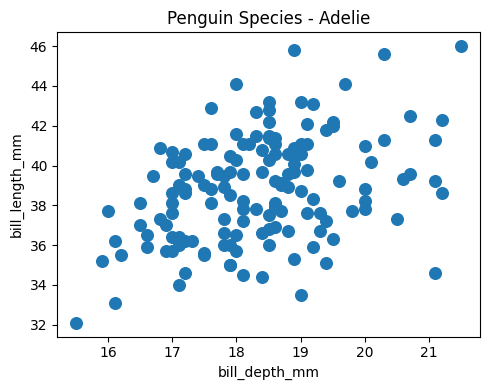

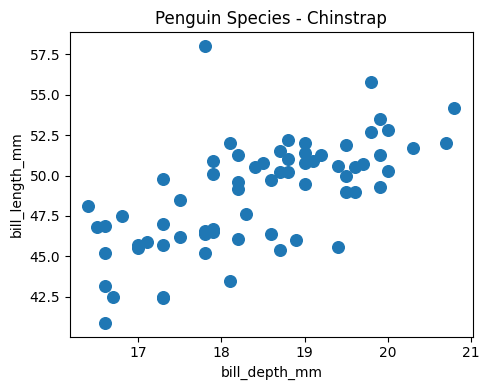

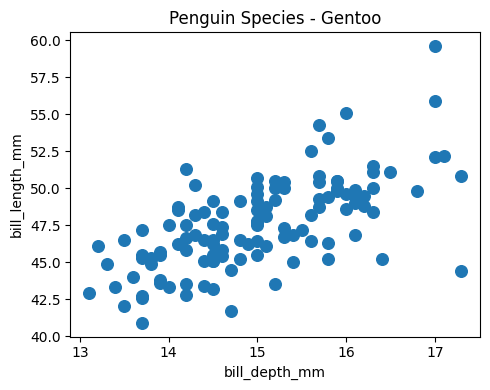

In [8]:
spName = list(df["species"].unique())

# fig, ax = plt.subplots(1, 3, figsize=(8,4)) 

for sp in spName:
    dsp = df[df["species"] == sp]

    plt.figure(figsize=(5,4))
        
    plt.scatter(dsp["bill_depth_mm"], 
                    dsp["bill_length_mm"],
                    s=70)
    plt.xlabel("bill_depth_mm")
    plt.ylabel("bill_length_mm")
    plt.title(f"Penguin Species - {sp}")
        
    plt.tight_layout()
    plt.show()

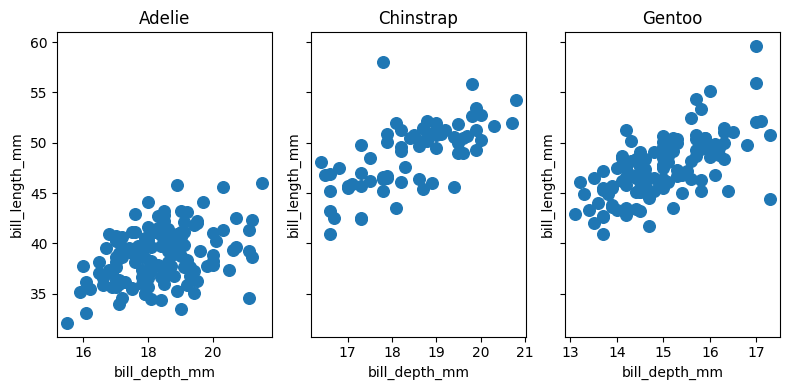

In [9]:
spName = list(df["species"].unique())
fig, ax = plt.subplots(1,3, figsize=(8,4), sharey=True)

for i,sp in enumerate(spName):
    df_sp = df[df["species"] == sp]

    # for i in range(3):
    ax[i].scatter(
        df_sp["bill_depth_mm"],
        df_sp["bill_length_mm"],
        s=70
    )
    ax[i].set_xlabel("bill_depth_mm")
    ax[i].set_ylabel("bill_length_mm")
    ax[i].set_title(sp)

plt.tight_layout()
plt.show()


In [10]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


['Adelie', 'Chinstrap', 'Gentoo']


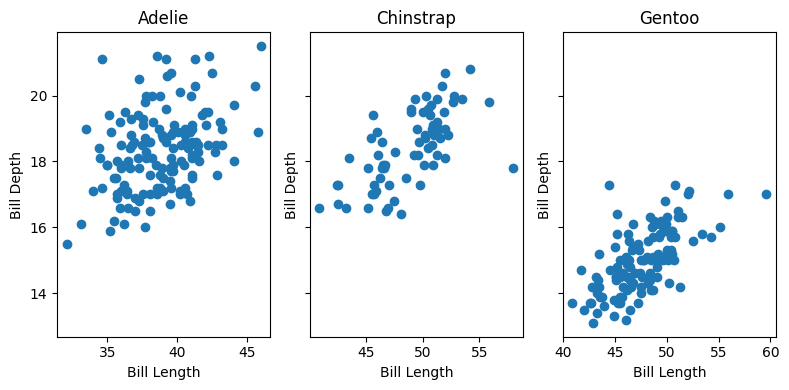

In [11]:
myrows = list(df["species"].unique())

print(myrows)

fig, ax = plt.subplots(1, 3, figsize=(8,4), sharey=True)

for indx, species in enumerate(myrows):
    ind_species = df[df["species"] == species]
    
    ax[indx].scatter(ind_species["bill_length_mm"], ind_species["bill_depth_mm"])
    ax[indx].set_xlabel("Bill Length")
    ax[indx].set_ylabel("Bill Depth")
    ax[indx].set_title(f"{species}")
plt.tight_layout()
plt.show()
    
    

In [12]:
# Add PCA

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn.decomposition import PCA

n_comp = 2
pca = PCA(n_components=n_comp)

X = df_num.copy()
scaler = StandardScaler()
pipe = Pipeline([("scaler", StandardScaler()),("PCA", PCA(n_components=n_comp))])
pca_array= pipe.fit_transform(X)



In [13]:
pca_df = pd.DataFrame(pca_array, columns=["PC1", "PC2"])
pca_df.shape

(333, 2)

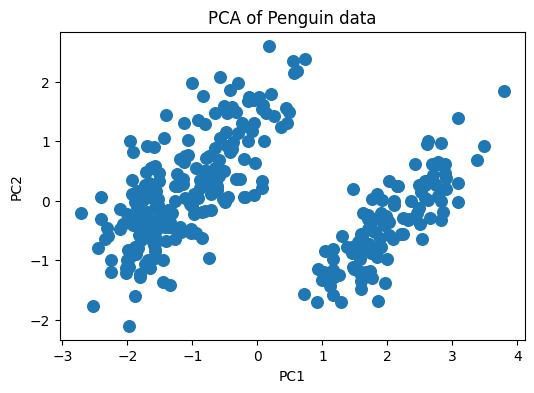

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(x=pca_df["PC1"], y=pca_df["PC2"], s=70)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Penguin data")
plt.show()

In [15]:
new_pca = pca_df.reset_index()
mydf = df.reset_index()
myspecies = list(df["species"].unique())

df_sp = new_pca[mydf["species"] == "Gentoo"]
df_sp

,index,PC1,PC2
214,214,1.593569,-1.341796
215,215,2.892054,0.464090
216,216,1.551572,-0.696760
217,217,2.620686,0.013723
218,218,2.234559,-0.563287
...,...,...,...
328,328,1.997716,-0.976771
329,329,1.832651,-0.784510
330,330,2.751505,0.266556
331,331,1.713854,-0.725875


In [22]:
new_pca = pca_df.reset_index()
mydf = df.reset_index()

print(new_pca.shape)
print(mydf.shape)

(333, 3)
(333, 8)


In [24]:
new_pca.head(3)


,index,PC1,PC2
0,0,-1.853593,0.032069
1,1,-1.316254,-0.443527
2,2,-1.376605,-0.161230


In [25]:
mydf.head(3)

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


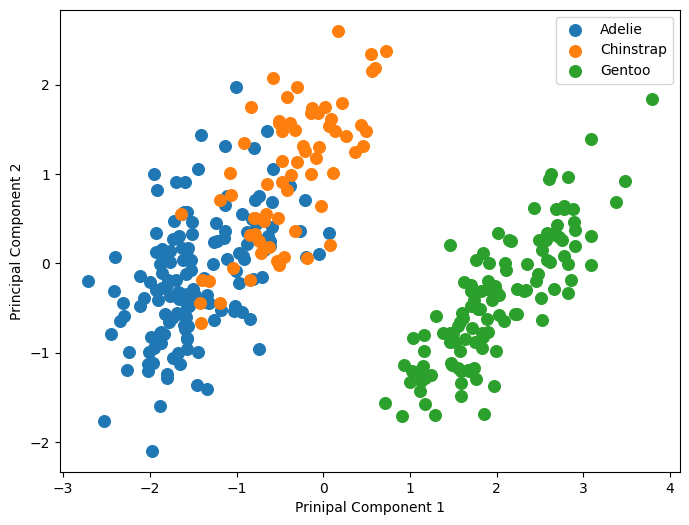

In [21]:
new_pca = pca_df.reset_index()
mydf = df.reset_index()

myspecies = list(df["species"].unique())

plt.figure(figsize=(8,6))

for species in myspecies:
    
    df_sp = new_pca[mydf["species"] == species]
    plt.scatter(df_sp["PC1"], df_sp["PC2"],
                s=70, label= f"{species}")
    
plt.xlabel("Prinipal Component 1")
plt.legend()
plt.ylabel("Principal Component 2")   
plt.show()
    